In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

ModuleNotFoundError: No module named 'graphviz'

## TO DO's

1. Implement Decision Tree
2. Regularization?
3. Find best Hyperparameters
4. Choose single Model

### Data Preparation

In [3]:
site_1 = pd.read_pickle("utilization_data_site1.pkl")
site_2 = pd.read_pickle("utilization_data_site2.pkl")

In [4]:
site_1

,hour,weekday,month,holiday,utilization,temperature,precipitation
0,13,0,10,True,0.076923,13.0,0.0
1,14,0,10,True,0.365385,14.0,0.0
2,15,0,10,True,0.365385,17.0,0.0
3,16,0,10,True,0.365385,18.0,0.0
4,17,0,10,True,0.365385,20.0,0.0
...,...,...,...,...,...,...,...
12966,19,1,3,True,0.057692,23.0,0.0
12967,20,1,3,True,0.057692,24.0,0.0
12968,21,1,3,True,0.057692,25.0,0.0
12969,22,1,3,True,0.057692,24.0,0.0


In [5]:
site_1_X = site_1.drop(columns = "utilization")
site_1_y = site_1['utilization']
site_2_X = site_2.drop(columns = 'utilization')
site_2_y = site_2['utilization']

In [6]:
# Split data into train, test, validation 60/20/20
site_1_X_train, site_1_X_test, site_1_y_train, site_1_y_test = train_test_split(site_1_X, site_1_y, test_size= 0.3, random_state=42)
site_2_X_train, site_2_X_test, site_2_y_train, site_2_y_test = train_test_split(site_2_X, site_2_y, test_size= 0.3, random_state=42)

In [7]:
# Scale data using MinMaxScaler from sklearn
site_1_scaler = MinMaxScaler()
site_2_scaler = MinMaxScaler()

site_1_scaler.fit(site_1_X_train)
site_2_scaler.fit(site_2_X_train)

site_1_X_train = site_1_scaler.fit_transform(site_1_X_train)
site_1_X_test  = site_1_scaler.transform(site_1_X_test)

site_2_X_train = site_2_scaler.fit_transform(site_2_X_train)
site_2_X_test  = site_2_scaler.transform(site_2_X_test)

### Linear Regression

In [8]:
# Creating a pipeline with two steps: scaling and linear regression
pipelineLin = Pipeline([
    ('scaling', StandardScaler()),  # Step 1: Standardize the features
    ('lin_reg', LinearRegression())  # Step 2: Apply Linear Regression
])

In [9]:
# Assuming X_train and y_train are your training data and labels
pipelineLin.fit(site_1_X_train, site_1_y_train)

Pipeline(steps=[('scaling', StandardScaler()), ('lin_reg', LinearRegression())])

In [10]:
# Now, you can make predictions
predictions = pipelineLin.predict(site_1_X_test)

In [11]:
# Calculate performance metrics
mse = mean_squared_error(site_1_y_test, predictions)
r2 = r2_score(site_1_y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.08070346129877043
R-squared: 0.4078915271337007


In [12]:
model = LinearRegression()

In [13]:
model.fit(site_1_X_train, site_1_y_train)

LinearRegression()

In [14]:
predictions2 = model.predict(site_1_X_test)

In [15]:
mse = mean_squared_error(site_1_y_test, predictions2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(site_1_y_test, predictions2)
r2 = r2_score(site_1_y_test, predictions2)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f'R^2: {r2}')

MSE: 0.08070346129877046
RMSE: 0.2840835463358807
MAE: 0.23136656289838864
R^2: 0.40789152713370047


### Polynomial Regression

In [29]:
degree = 3
poly_features = PolynomialFeatures(degree=degree)
site_1_X_train_poly = poly_features.fit_transform(site_1_X_train)
site_1_X_test_poly = poly_features.transform(site_1_X_test)

In [14]:
model = LinearRegression()
model.fit(site_1_X_train_poly, site_1_y_train)

LinearRegression()

In [15]:
y_pred = model.predict(site_1_X_test_poly)

In [16]:
mse = mean_squared_error(site_1_y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(site_1_y_test, y_pred)
r2 = r2_score(site_1_y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f'R^2: {r2}')

MSE: 0.03736097976374708
RMSE: 0.19328988531153687
MAE: 0.14249218845038825
R^2: 0.725888427625123


In [21]:
degrees = np.arange(1, 50)
mse_values = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    site_1_X_train_poly = poly_features.fit_transform(site_1_X_train)
    site_1_X_test_poly = poly_features.transform(site_1_X_test)

    model = Ridge(alpha = 0.5)

    model.fit(site_1_X_train_poly, site_1_y_train)

    y_pred = model.predict(site_1_X_test_poly)

    mse = mean_squared_error(site_1_y_test, y_pred)
    mse_values.append(mse)

    print(f"MSE: {mse}")
    print(f"round: {degree}")

# Plot the results
plt.plot(degrees, mse_values, marker='o')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('MSE vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

MSE: 0.08070305472327195
round: 1
MSE: 0.05211726691676432
round: 2
MSE: 0.03795658216490144
round: 3
MSE: 0.03374812563591028
round: 4
MSE: 0.031086282702518595
round: 5
MSE: 0.029138996228018122
round: 6
MSE: 0.027668583808904683
round: 7
MSE: 0.0266695620193606
round: 8
MSE: 0.026066817552128016
round: 9
MSE: 0.025725602227667316
round: 10
MSE: 0.025518822300601485
round: 11
MSE: 0.025363399081749945
round: 12
MSE: 0.025221195360224487
round: 13
MSE: 0.02508132376019136
round: 14
MSE: 0.02494420447138523
round: 15


KeyboardInterrupt: 

In [ ]:
degrees = np.arange(1, 10)
mse_values = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    site_1_X_train_poly = poly_features.fit_transform(site_1_X_train)
    site_1_X_test_poly = poly_features.transform(site_1_X_test)

    model = LinearRegression()
    model.fit(site_1_X_train_poly, site_1_y_train)

    y_pred = model.predict(site_1_X_test_poly)

    mse = mean_squared_error(site_1_y_test, y_pred)
    mse_values.append(mse)

    print(f"MSE: {mse}")
    print(f"round: {degree}")

# Plot the results
plt.plot(degrees, mse_values, marker='o')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('MSE vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

MSE: 0.08070346129877043
round: 1
MSE: 0.052166341328238296
round: 2
MSE: 0.03736097976374708
round: 3
MSE: 33574073.13730389
round: 4
MSE: 696412502.8531755
round: 5
MSE: 17172029960.089828
round: 6
MSE: 9166108958866.318
round: 7
MSE: 745968469744251.6
round: 8
MSE: 1608835120403.005
round: 9


In [76]:


alphas = [0.0001, 0.005, 0.01, 0.05 , 0.1, 0.15, 0.2, 0.25, 0.3]

for alpha in alphas: 
    model_L1 = Lasso(alpha = alpha, max_iter=10_000)
    
    model_L1.fit(site_1_X_train_poly, site_1_y_train)
    predict = model_L1.predict(site_1_X_test_poly)
    
    print ('The R^2 for quadratic curve is: ',r2_score(site_1_y_test, predict))

The R^2 for quadratic curve is:  0.7260290996725962
The R^2 for quadratic curve is:  0.5617400459265278
The R^2 for quadratic curve is:  0.5010548623588067
The R^2 for quadratic curve is:  0.1216989180914212
The R^2 for quadratic curve is:  -0.0010474681094834182
The R^2 for quadratic curve is:  -0.0010474681094834182
The R^2 for quadratic curve is:  -0.0010474681094834182
The R^2 for quadratic curve is:  -0.0010474681094834182
The R^2 for quadratic curve is:  -0.0010474681094834182


In [77]:


degree = 3
poly_features = PolynomialFeatures(degree=degree)
site_1_X_train_poly = poly_features.fit_transform(site_1_X_train)
site_1_X_test_poly = poly_features.transform(site_1_X_test)

model_L2 = Ridge(alpha = 0.5)

model_L2.fit(site_1_X_train_poly, site_1_y_train)
prediction = model_L2.predict(site_1_X_test_poly)

#print("Coefficients ", model_L2.coef_, "\nIntercept ", model_L2.intercept_ )

print ('The R^2 for quadratic curve is: ',r2_score(site_1_y_test, prediction))

The R^2 for quadratic curve is:  0.7215185874409773


### Decision Tree

In [8]:
xp = site_1_X["hour"].to_frame().values
yp = site_1_y

In [9]:
def plot_tree_regression_line(tree_depth):

    # Fit regression model (to full data)
    Tree_reg = DecisionTreeRegressor(max_depth=tree_depth,
                                    criterion="squared_error") # Other options: "friedman_mse"
    Tree_reg.fit(xp.reshape(-1, 1), yp)
    Y_pred = Tree_reg.predict(xp.reshape(-1, 1))
    
    attributes = Tree_reg.tree_

    # plot
    plt.figure(figsize = (8,6))
    plt.scatter(xp, yp, marker="x")
    plt.plot(np.arange(-18,40,1), Tree_reg.predict(np.arange(-18,40,1).reshape(-1, 1)), marker="x", color='C1')
    plt.xlabel("High Temperature (°C)", fontsize=16)
    plt.ylabel("Peak Demand (GW)", fontsize=16)
    
    print("number of nodes: ", attributes.node_count)
    print("number of leafs: ", attributes.n_leaves)
    print("R^2: ", r2_score(yp, Y_pred))
    
    
    #plt.savefig("Peak_Power_Regression_Lines_{}depth.pdf".format(tree_depth))

number of nodes:  37
number of leafs:  19
R^2:  0.4333873279233471


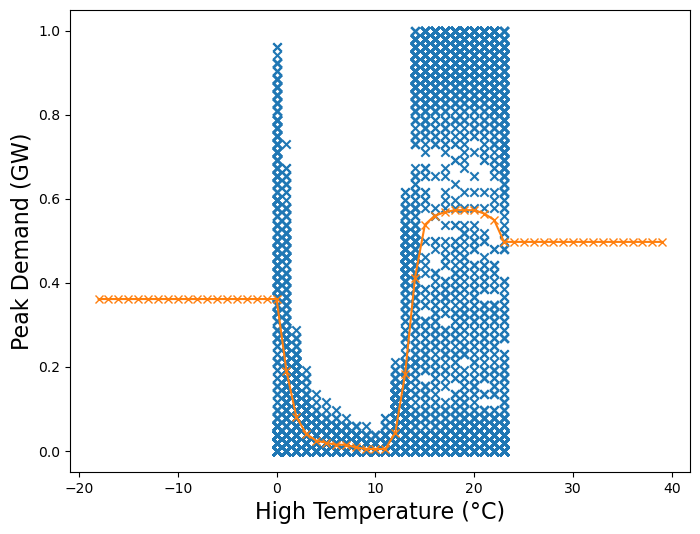

In [10]:
plot_tree_regression_line(8)

In [56]:
#site_1_X_train_reshaped = site_1_X_train.reshape((-1, 1))
print("Dimensions of X:", site_1_X_train.shape)
print("Dimensions of y:", site_1_y_train.shape)

Dimensions of X: (9079, 6)
Dimensions of y: (9079,)


In [15]:
def plot_regression_tree_sklearn(tree_depth):

    # Fit regression model (to full data)
    model = DecisionTreeRegressor(max_depth=tree_depth)
    model.fit(xp.reshape((-1,1)), yp) 
    
    dot_data = export_graphviz(model,
                              feature_names=["High_temp"])  
    
    graph = graphviz.Source(dot_data) 
    
    return graph

In [16]:
plot_regression_tree_sklearn(4)

NameError: name 'graphviz' is not defined

In [11]:
site_1['hour'] = (site_1['hour'] - 8) % 24
site_1['hour'] = site_1['hour'].astype(int)
site_2['hour'] = (site_2['hour'] - 8) % 24
site_2['hour'] = site_2['hour'].astype(int)

In [12]:
xp = site_1["hour"]
yp = site_1["utilization"]

Text(0, 0.5, 'Utilization')

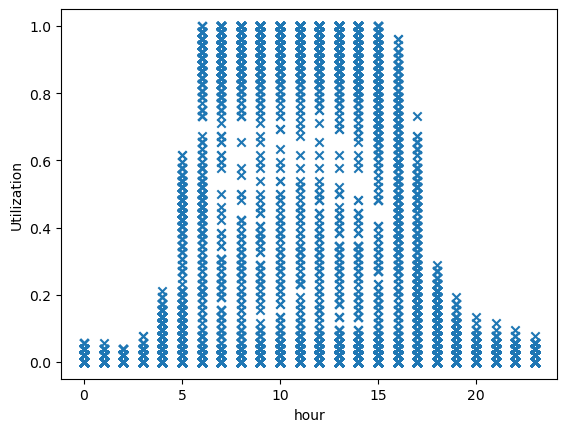

In [13]:
plt.scatter(xp, yp, marker='x')
plt.xlabel("hour")
plt.ylabel("Utilization")

[-405.68094197  786.20893351  871.54897277   58.17870187]


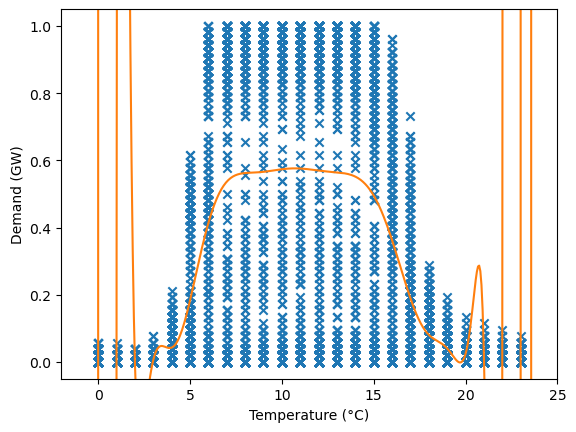

In [14]:
# x is the input variable
# y is the output vaiable
# d is degree pf polynomial regression

def plot_regression_poly(x, y, d):
    
    #Scaling data using min-max method
    min_x, max_x = x.min(), x.max()
    xs = 2*(x - min_x)/(max_x - min_x)-1
    
    #Creating Polynomial features
    X = np.array([xs**i for i in range(d,-1,-1)]).T
    
    #Solving normal equation and finding coefficients
    theta = np.linalg.solve(X.T @ X, X.T @ y)
    xt0 = np.linspace(min_x-1, max_x+1, 400)
    xt = 2* (xt0 - min_x)/(max_x - min_x) -1
    Xt = np.array([xt**i for i in range(d,-1,-1)]).T
    yt = Xt @ theta
        
    plt.scatter(x, y, marker="x")
    ylim = plt.ylim()
    plt.plot(xt0, yt, 'C1')
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Demand (GW)")
    plt.xlim([min_x-2, max_x+2])
    plt.ylim(ylim)
    print(theta[:4])
    #plt.savefig('all data_reg_'+str(d)+'.png', dpi = 300)

plot_regression_poly(x = xp, y=yp, d = 100)


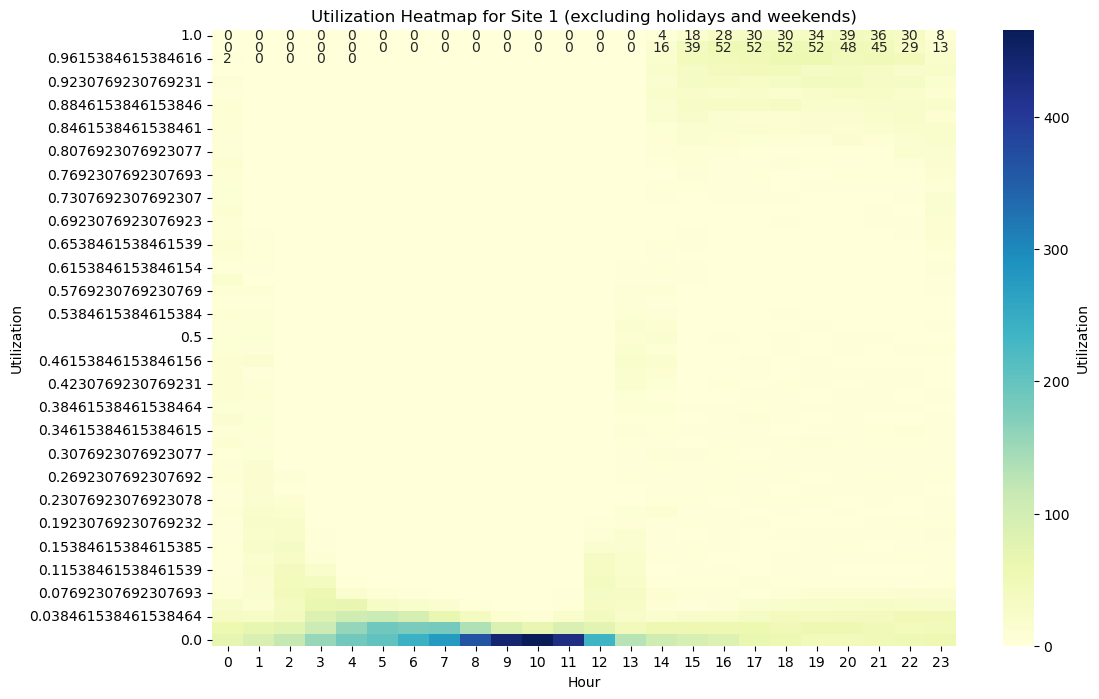

In [49]:
# Hier gehe ich davon aus, dass Ihre Spalte mit den Stunden "hour" heißt
# und die Spalte mit der Nutzung "utilization" heißt.
# Bitte passen Sie die Spaltennamen entsprechend an.

# Filtern Sie die Daten, um Feiertage und Wochenenden zu entfernen
filtered_data2 = site_1[(site_1['holiday'] == False) & (site_1['weekday'] < 5)]

# Erstellen Sie eine Pivot-Tabelle für die Heatmap
heatmap_data = filtered_data.pivot_table(index='utilization', columns='hour', aggfunc='size', fill_value=0)

# Erstellen Sie die Heatmap mit umgekehrter Y-Achse
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data[::-1], cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Utilization'})

# Einstellungen für die Achsenbeschriftungen und den Plot-Titel
plt.xlabel('Hour')
plt.ylabel('Utilization')
plt.title('Utilization Heatmap for Site 1 (excluding holidays and weekends)')

# Zeigen Sie die Heatmap an
plt.show()

In [44]:
filtered_data

,hour,weekday,month,utilization,temperature,precipitation
0,13,0,10,0.076923,13.0,0.0
1,14,0,10,0.365385,14.0,0.0
2,15,0,10,0.365385,17.0,0.0
3,16,0,10,0.365385,18.0,0.0
4,17,0,10,0.365385,20.0,0.0
...,...,...,...,...,...,...
12966,19,1,3,0.057692,23.0,0.0
12967,20,1,3,0.057692,24.0,0.0
12968,21,1,3,0.057692,25.0,0.0
12969,22,1,3,0.057692,24.0,0.0


In [45]:
print(site_1.corr())

                   hour   weekday     month   holiday  utilization  \
hour           1.000000 -0.001191  0.000726  0.003657     0.496667   
weekday       -0.001191  1.000000 -0.000691 -0.125544    -0.346962   
month          0.000726 -0.000691  1.000000  0.000380    -0.028546   
holiday        0.003657 -0.125544  0.000380  1.000000    -0.102660   
utilization    0.496667 -0.346962 -0.028546 -0.102660     1.000000   
temperature    0.230748 -0.002021  0.233564 -0.071864     0.290655   
precipitation  0.007504 -0.007683 -0.021305 -0.000130     0.005524   

               temperature  precipitation  
hour              0.230748       0.007504  
weekday          -0.002021      -0.007683  
month             0.233564      -0.021305  
holiday          -0.071864      -0.000130  
utilization       0.290655       0.005524  
temperature       1.000000      -0.097912  
precipitation    -0.097912       1.000000  


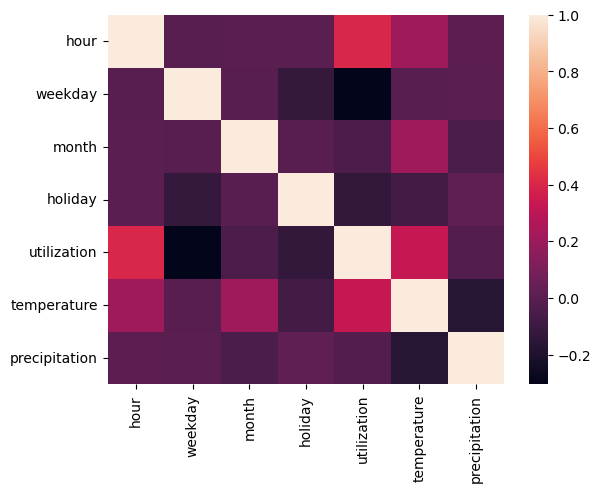

In [47]:
sns.heatmap(site_1.corr(method = "spearman"));

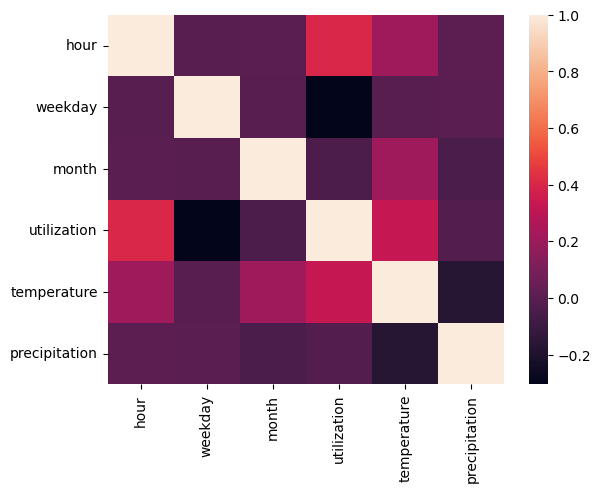

In [48]:
sns.heatmap(filtered_data.corr(method = "spearman"));

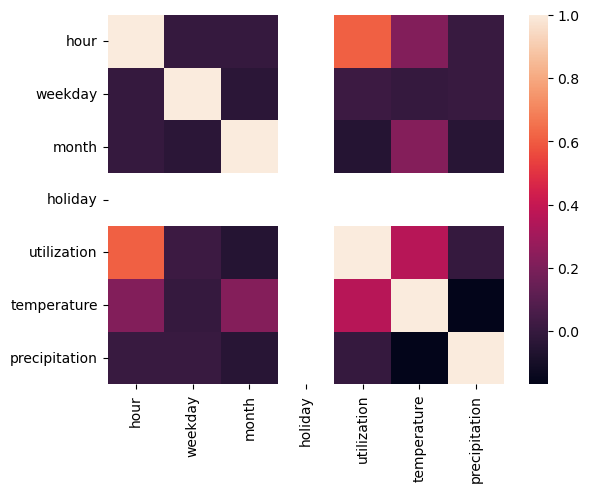

In [50]:
sns.heatmap(filtered_data2.corr(method = "spearman"));

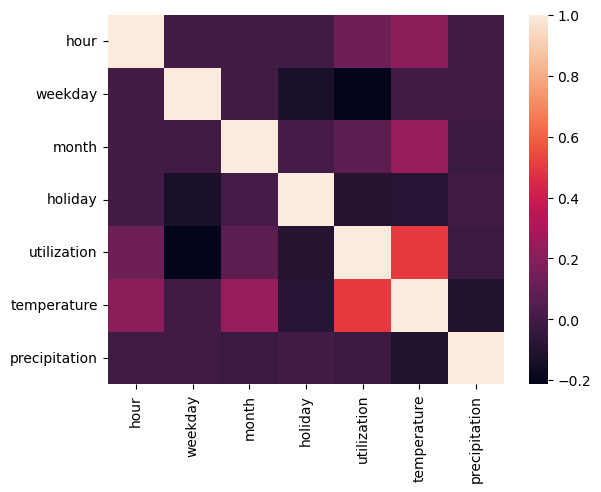

In [18]:
sns.heatmap(site_2.corr());